In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('sales.csv')

In [15]:
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [16]:
# Check for null values in each column
null_counts = data.isnull().sum()

print("Null values in each column:")
print(null_counts)

Null values in each column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [17]:
# Check for null values
print("\nMissing values before imputation:")
print(data.isnull().sum())

# Simple imputer - handle missing values
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer_mean = SimpleImputer(strategy='mean')

# Apply the imputer to the 'Item_Weight' column
data['Item_Weight'] = imputer_mean.fit_transform(data[['Item_Weight']])

# Create an imputer object with a most frequent filling strategy
imputer_freq = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Outlet_Size' column
data['Outlet_Size'] = imputer_freq.fit_transform(data[['Outlet_Size']]).ravel()  # Use ravel() to convert 2D array to 1D

# Check for remaining missing values
print("\nRemaining missing values:")
print(data.isnull().sum())



Missing values before imputation:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Remaining missing values:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [18]:
# Check for duplicate rows
duplicates_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


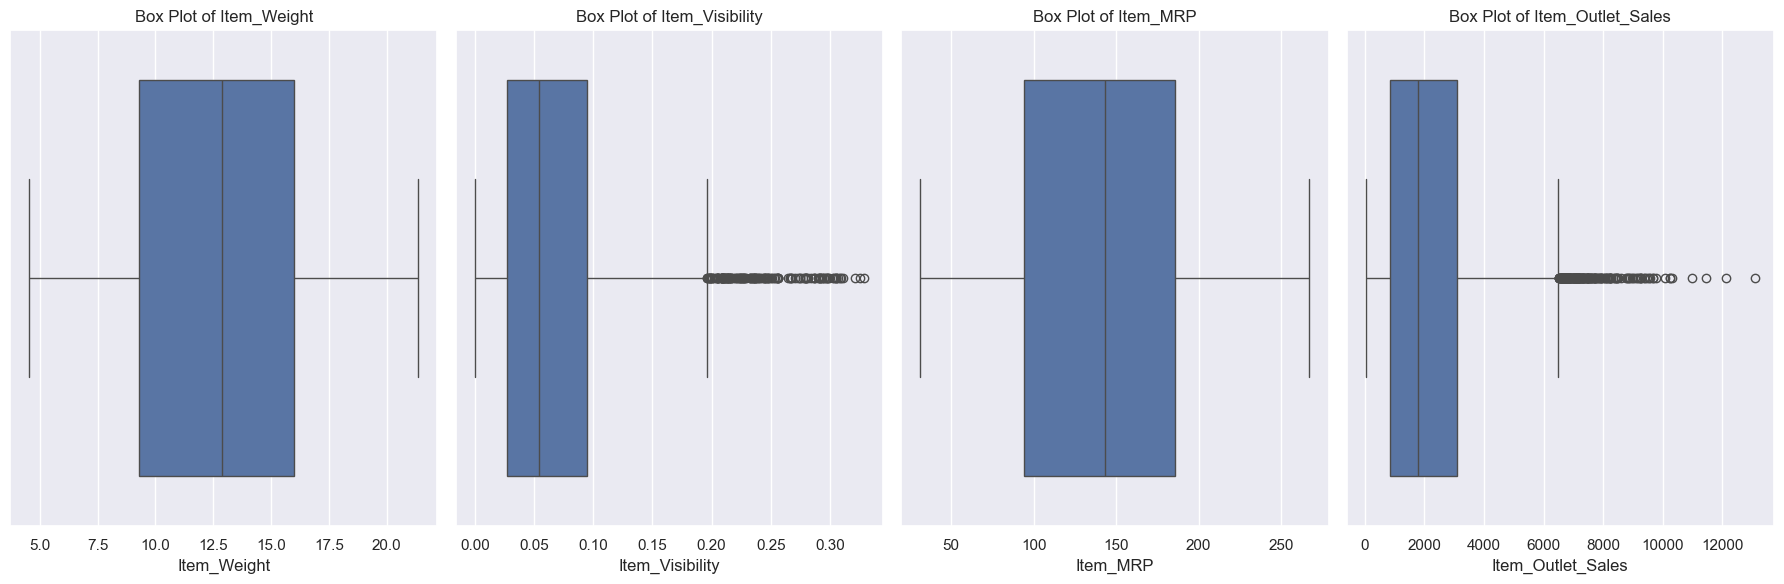

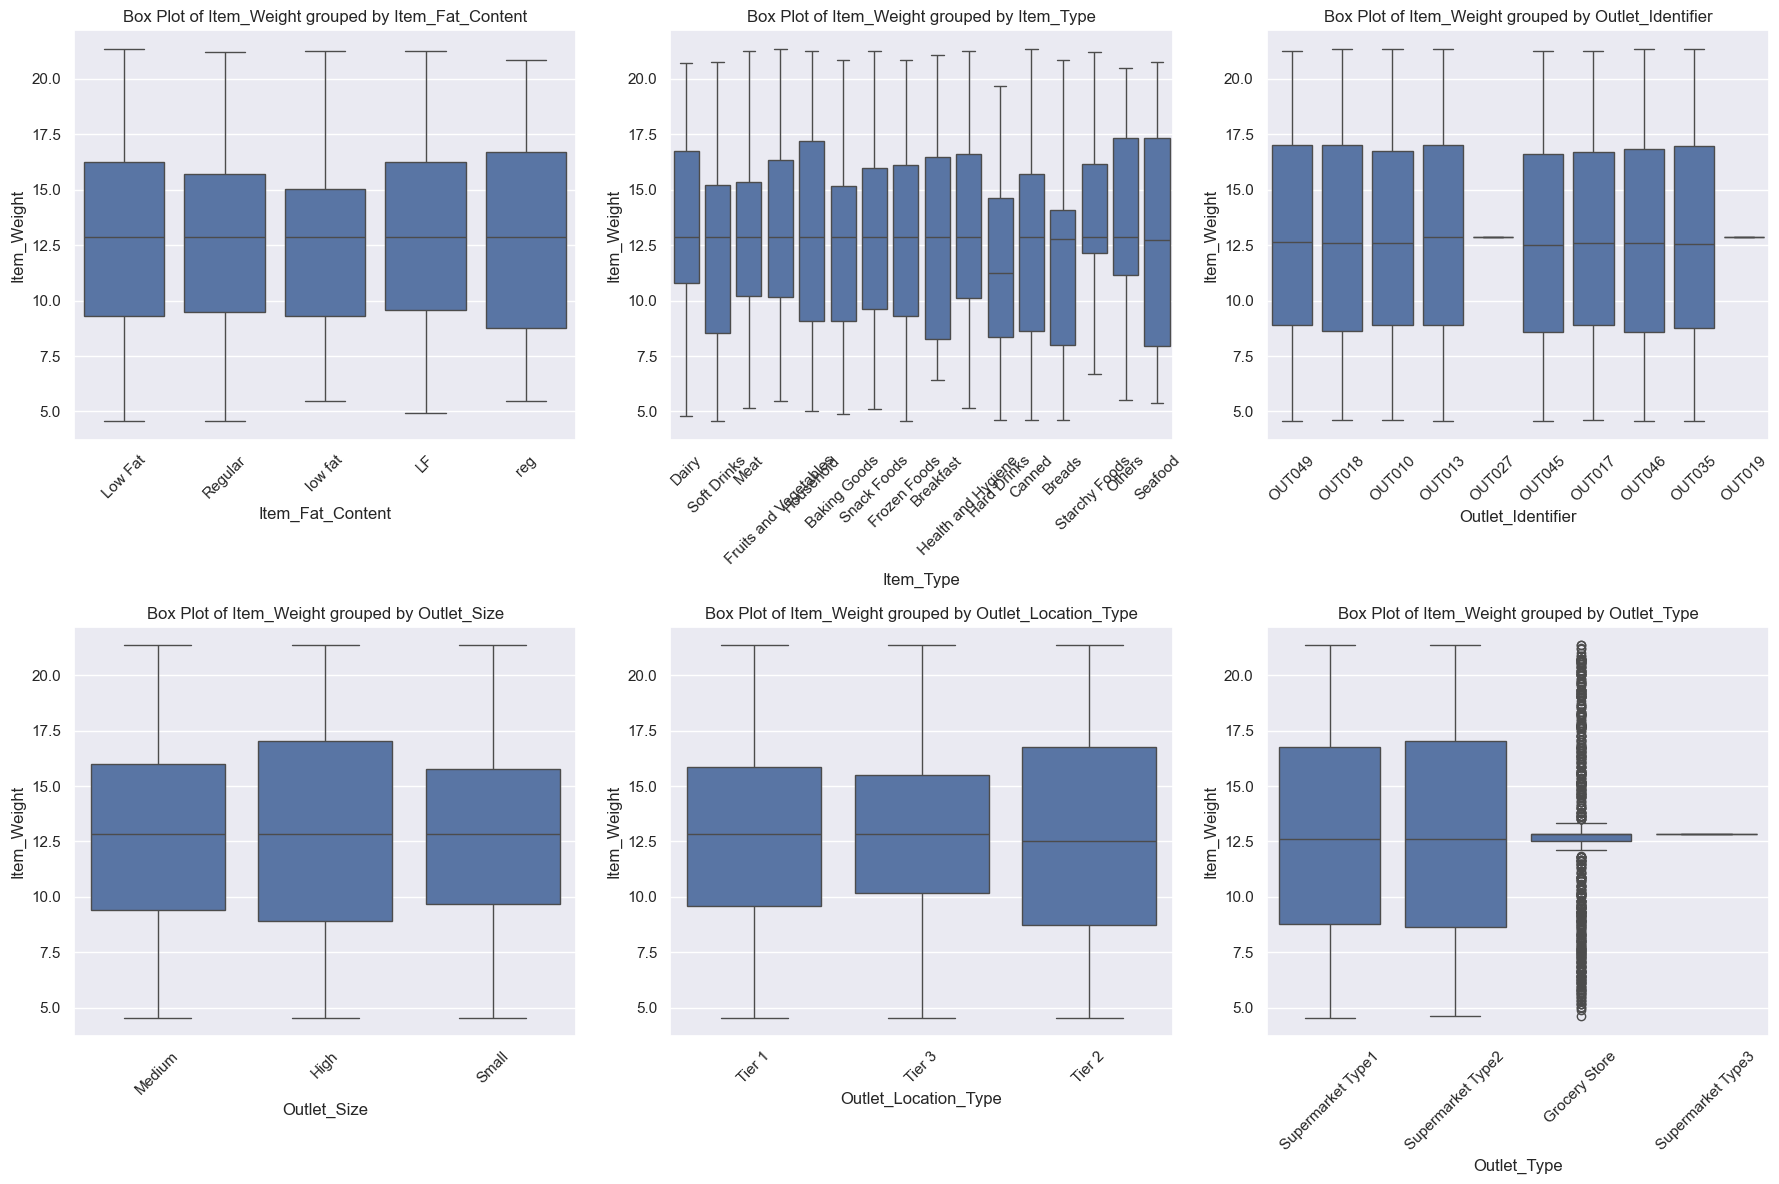

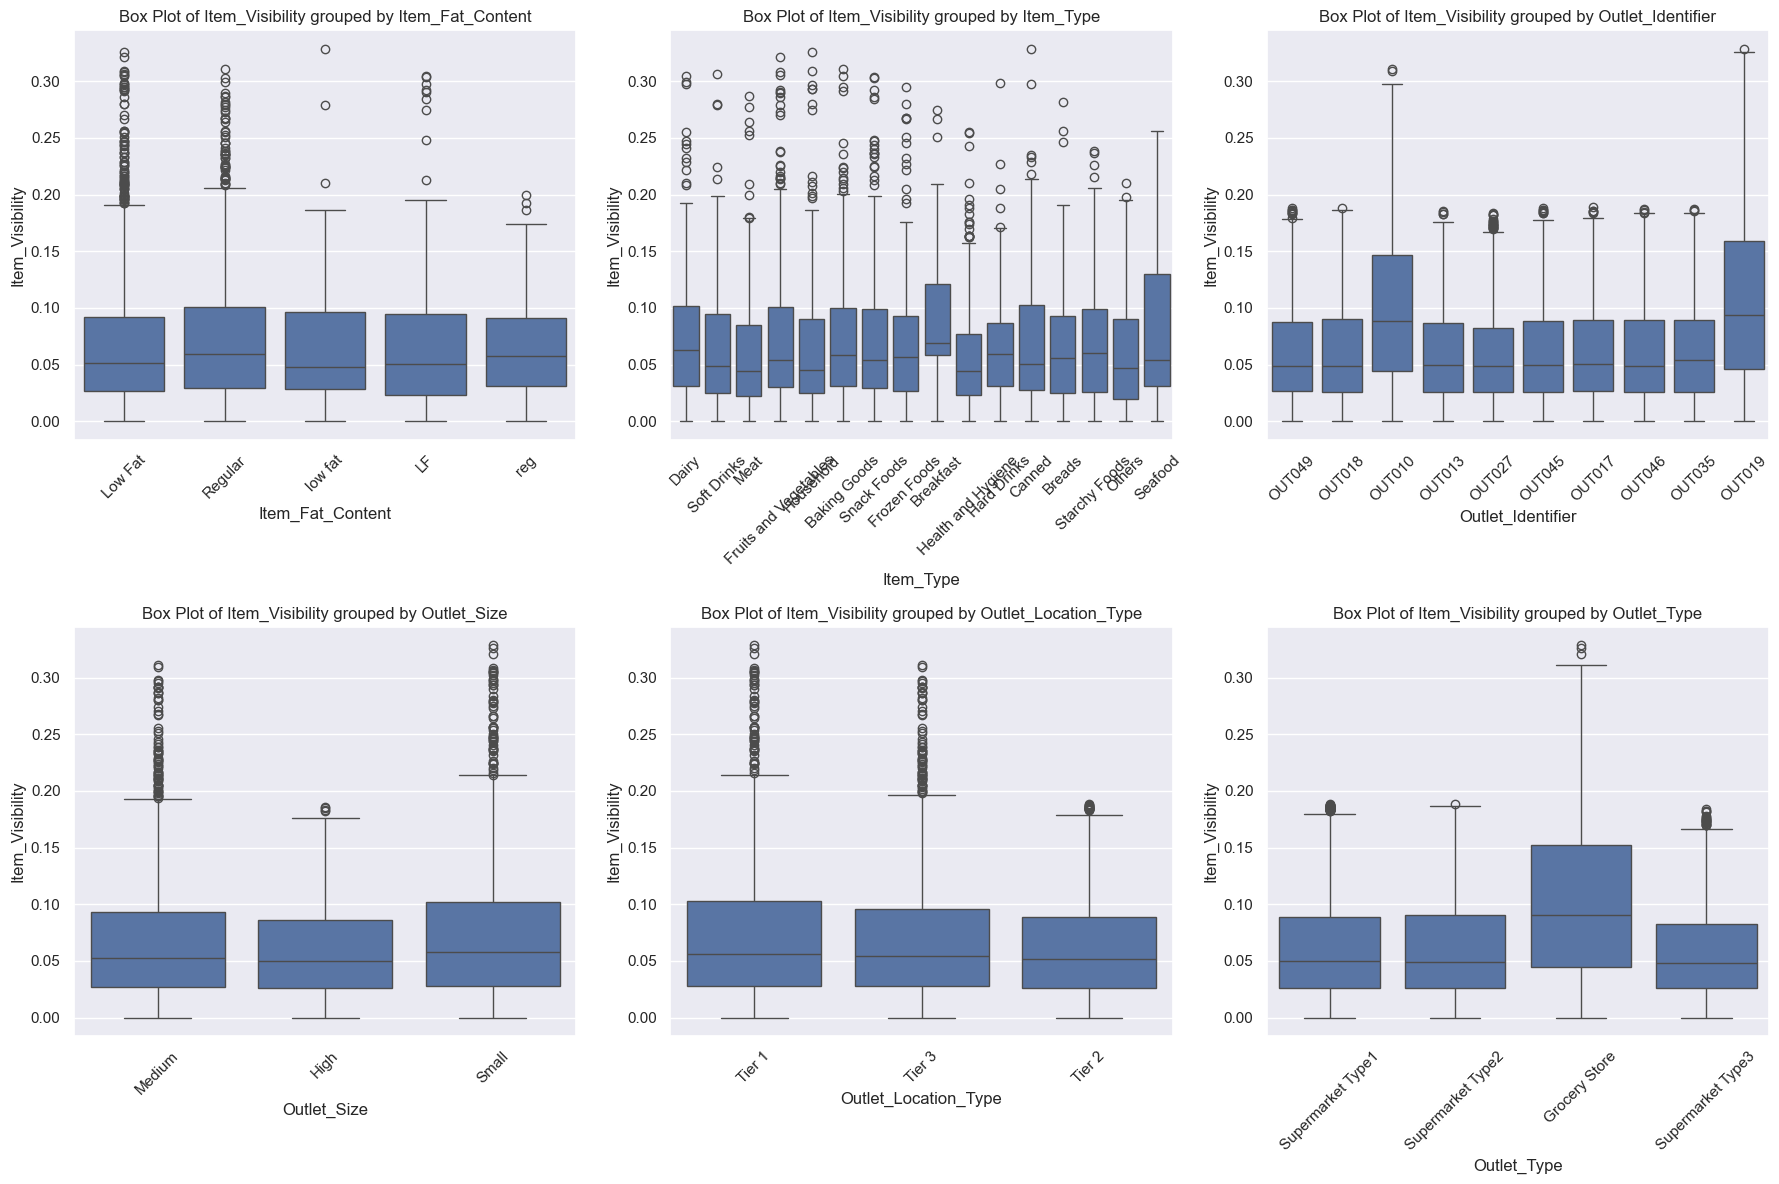

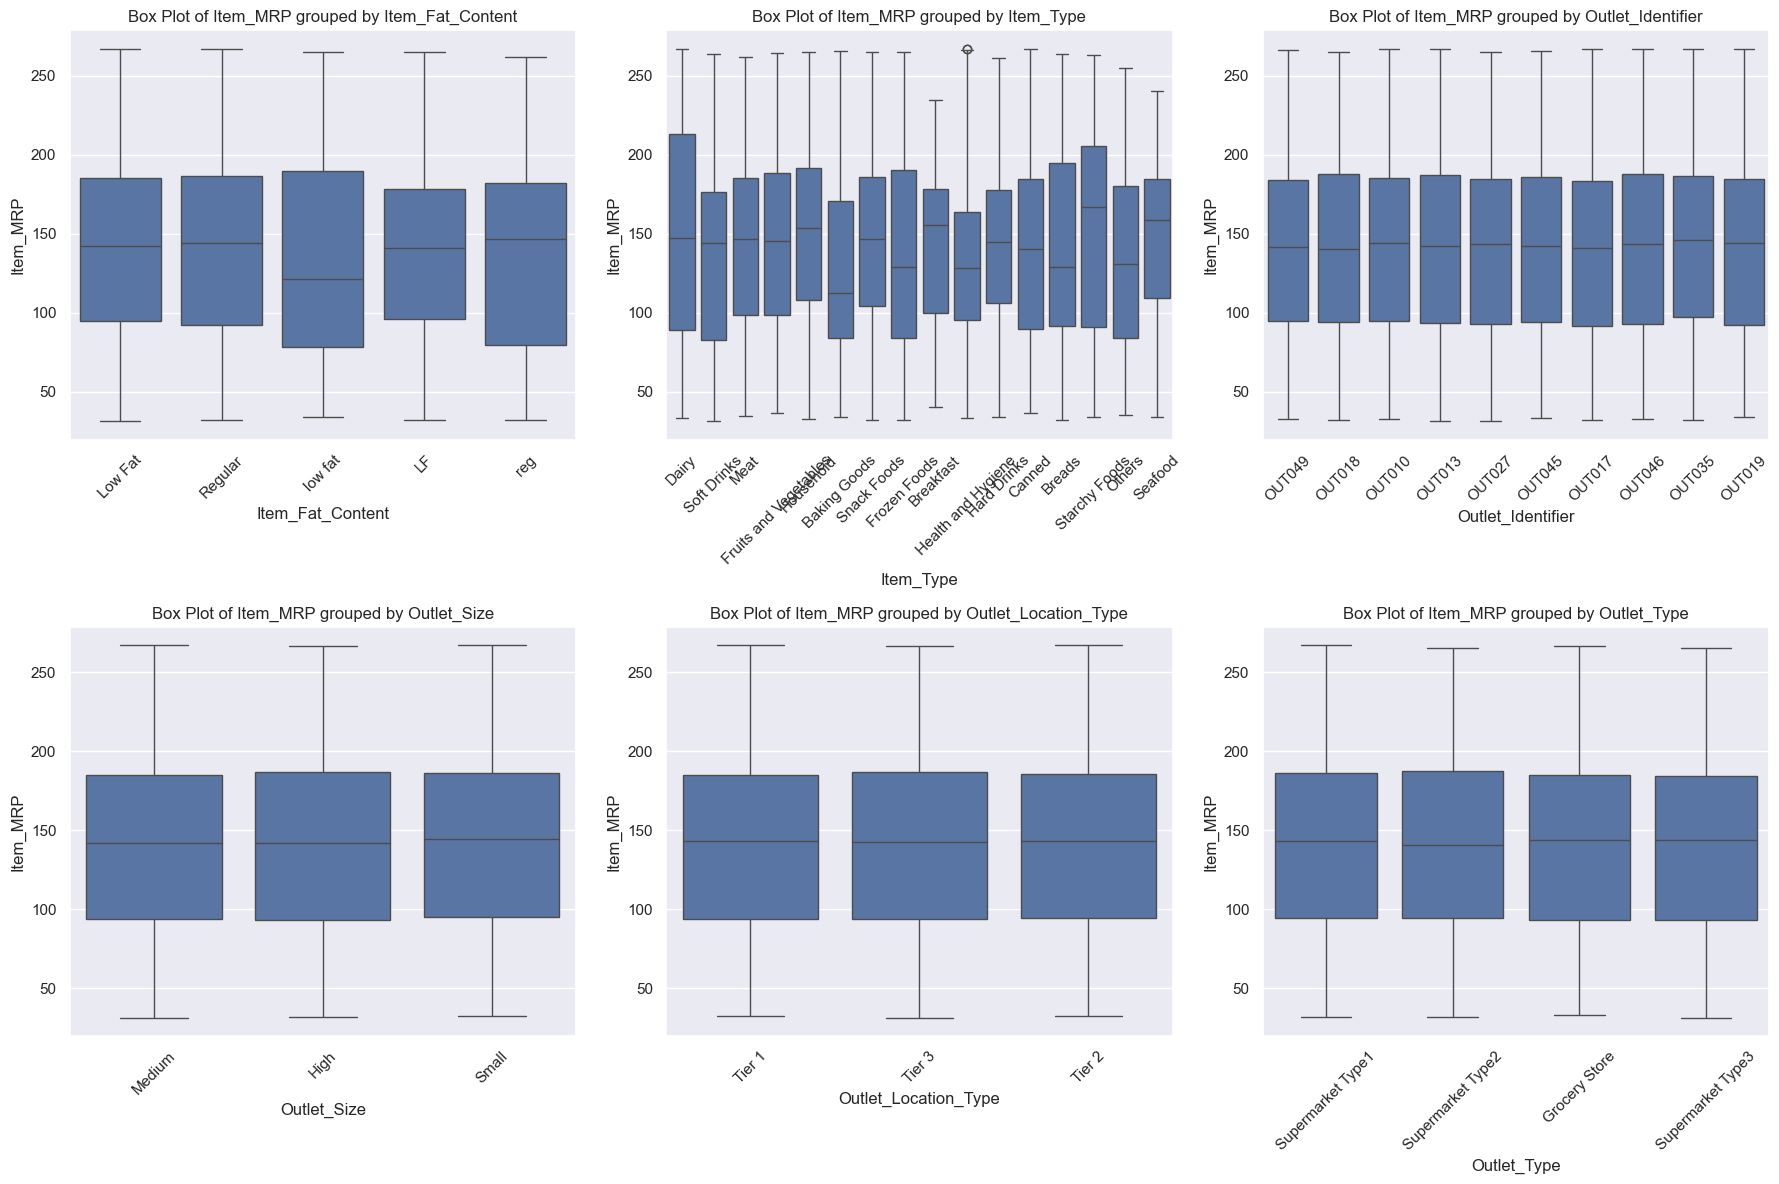

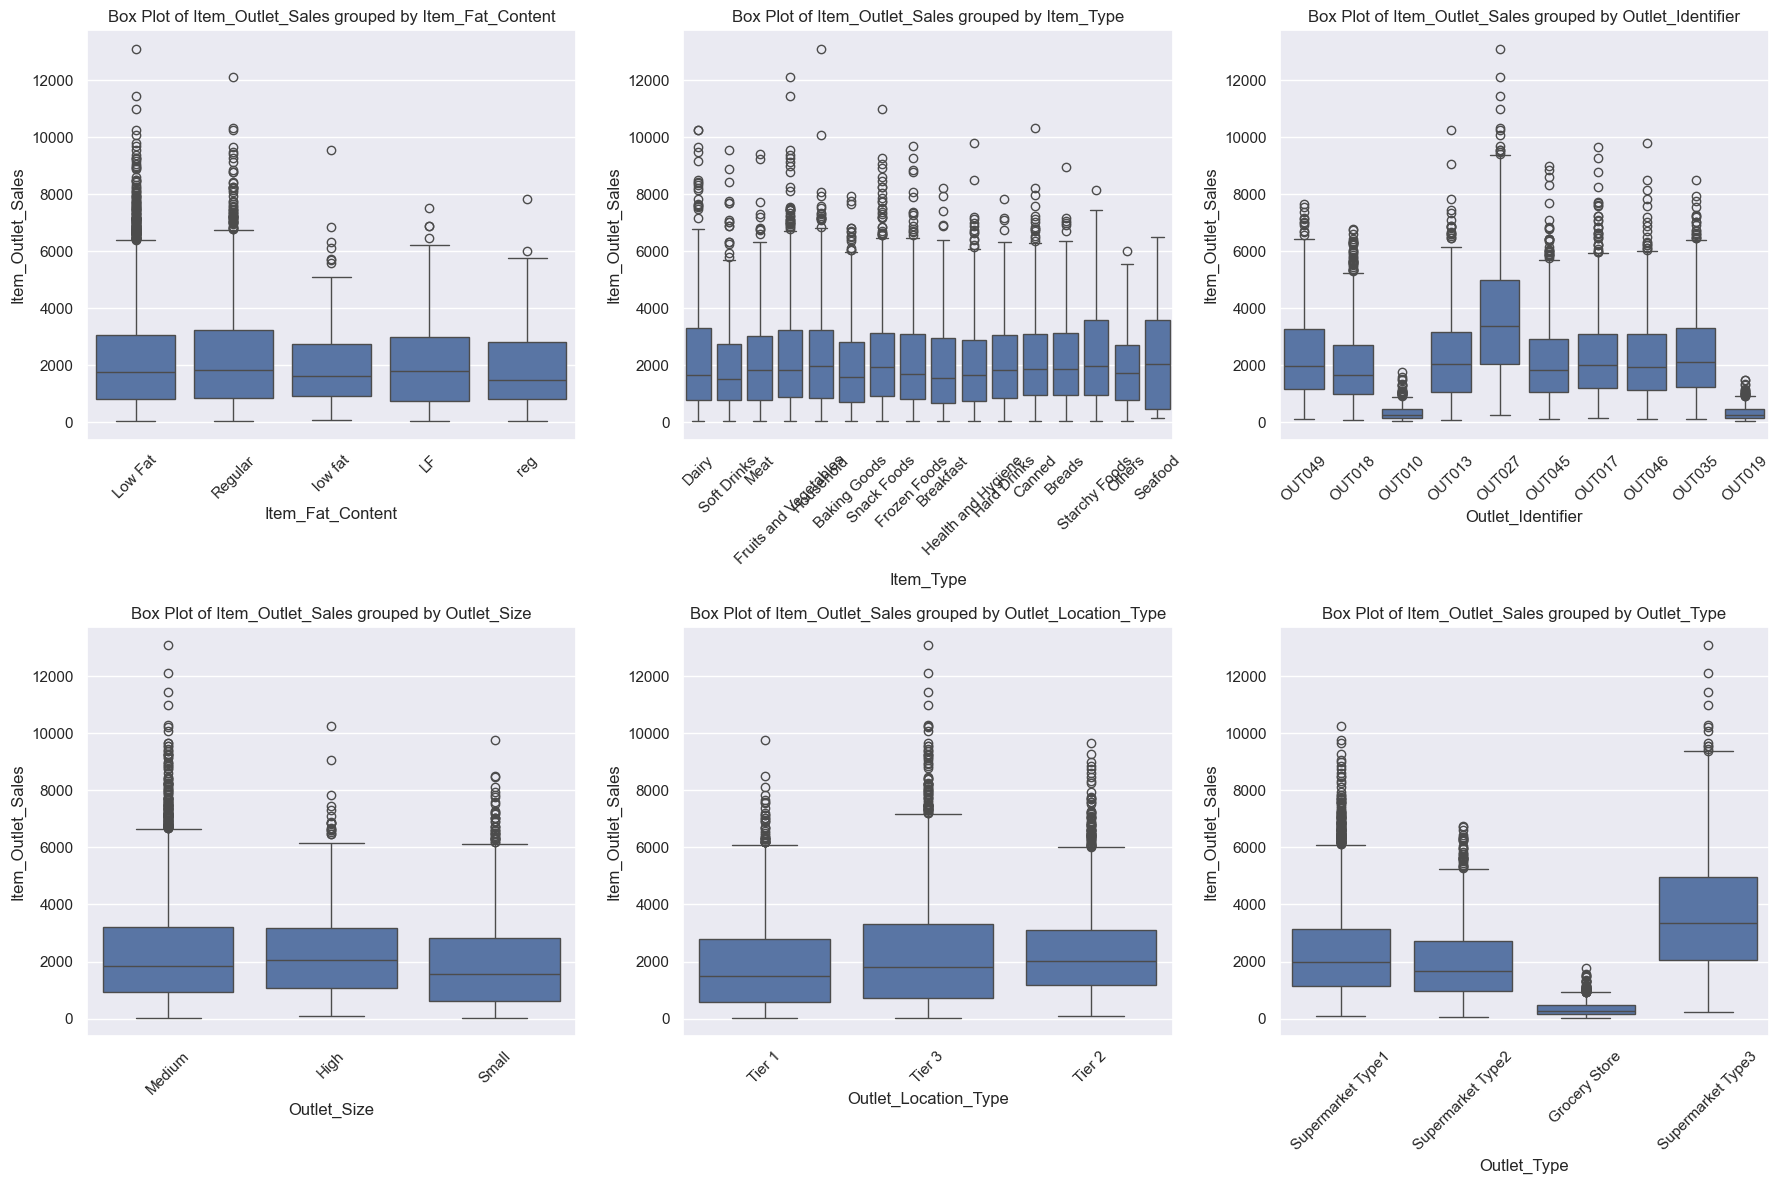

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'data'
# data = pd.read_csv('your_dataset.csv')

# List of numerical columns to plot
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Number of columns for the grid
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create boxplots for each numerical attribute
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# List of categorical columns to plot
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Create boxplots for each numerical attribute grouped by each categorical attribute
for num_col in numerical_columns:
    n_cols = 3
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))
    axes = axes.flatten()
    
    for i, cat_col in enumerate(categorical_columns):
        sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[i])
        axes[i].set_title(f'Box Plot of {num_col} grouped by {cat_col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


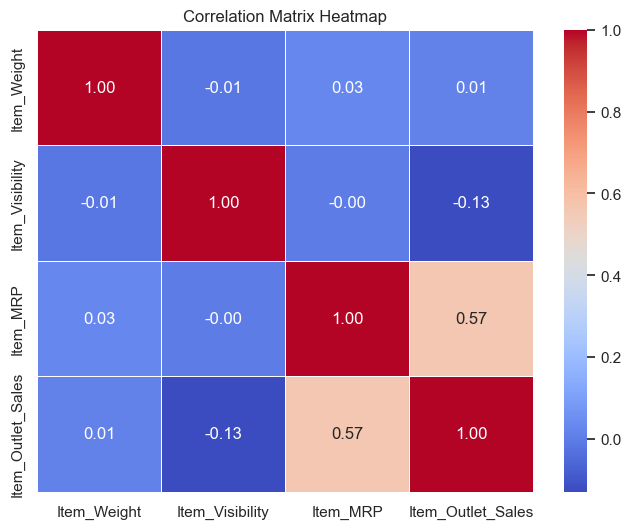

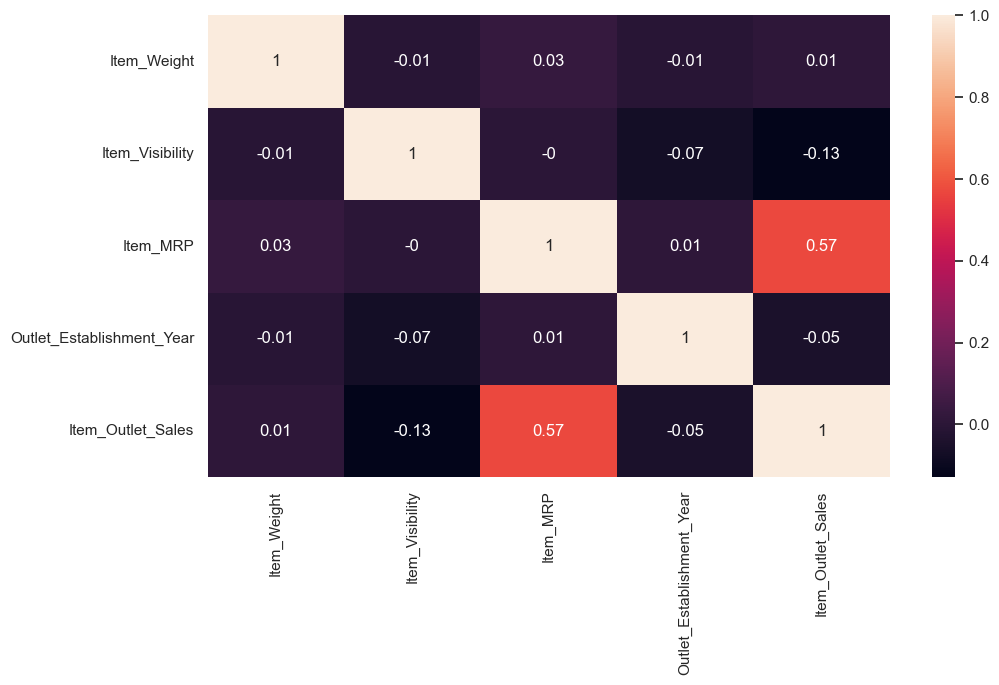

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.heatmap(data.corr(numeric_only=True).round(2), annot = True)
plt.show()

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(20, 5))

# Generate a heatmap of the correlations between features, excluding 'Item_Identifier' and 'Outlet_Identifier'
sns.heatmap(
    data.drop(columns=['Item_Identifier', 'Outlet_Identifier']).corr(),
    annot=True,  # Annotate the heatmap with correlation values
    cmap='coolwarm',  # Color map for better visualization
    fmt='.2f',  # Format of annotation values
    linewidths=0.5,  # Width of lines that will divide each cell
    linecolor='gray'  # Color of the lines that divide cells
)

# Set the title and customize axis labels
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.xticks(rotation=20, fontsize=10)
plt.yticks(rotation=0, fontsize=10)  # Optionally, rotate y-axis labels if needed

# Display the heatmap
plt.show()


ValueError: could not convert string to float: 'Low Fat'

<Figure size 2000x500 with 0 Axes>

In [35]:
print(data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [21]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

/var/folders/cg/cnkmd0bs2blbd3kxfwnpx9900000gp/T/ipykernel_22395/3254681772.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




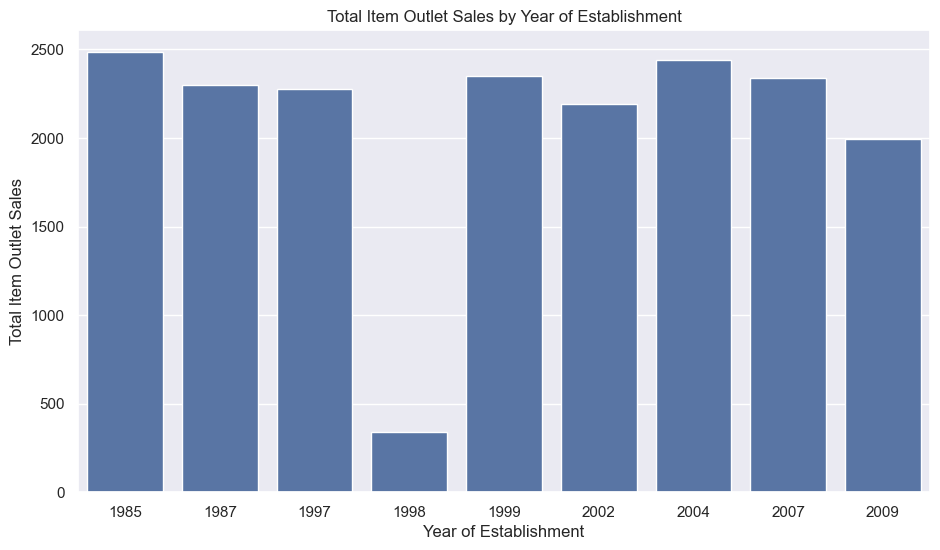

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('sales.csv')

# Set the visual properties
sns.set(rc={'figure.figsize':(11, 6)})

# Create a bar plot for Item_Outlet_Sales by Outlet_Establishment_Year
sns.barplot(data=data, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ci=None)

# Add title and labels
plt.title('Total Item Outlet Sales by Year of Establishment')
plt.xlabel('Year of Establishment')
plt.ylabel('Total Item Outlet Sales')

# Show the plot
plt.show()

In [29]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

import nbformat
print(nbformat.__version__)


# Load the dataset
data = pd.read_csv('sales.csv')

# Create a line plot for Item_Outlet_Sales, Item_Visibility, and Item_MRP
fig = px.line(data, x='Outlet_Establishment_Year', 
              y=['Item_Outlet_Sales'],
              title='Item Outlet Sales, Visibility, and MRP by Year of Establishment')

# Show the plot
fig.show()


5.10.4


In [24]:
# Features and target variable
X = data.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Regular'

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')



MAE: 758.7134755859238
MSE: 1177868.3389476684
RMSE: 1085.2964290679613
R²: 0.5666367509286603


In [ ]:
# Save the model and label encoders
joblib.dump(model, 'sales_prediction_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']